# Perceptron
- Input values $ (1,x_1,x_2,...,x_n) $
- multiplied by respective weights
$ (w_0, w_1, w_2,..., w_n) $
- Entire expression is summed together inside the neuron
$ (w_0 + x_1w_1 + x_2w_2 + ... + x_nw_n)  $
- If sum is larger than specified threshold (activation function) step function outputs 1, otherwise outputs 0

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron learning')

#data is label, x1, x2
data = np.array([[1,1,1],
                 [1,1,2],
                 [0,2,-2],
                 [0,-2,-1],
                 [0,-1,-2],
                 [1,-2,1],
                 [1,-1,1]])

rows = data.shape[0]
cols = data.shape[1]


L  = data[:, 0]
X1 = data[:, 1]
X2 = data[:, 2]
W  = np.array([0, 1, 0.5])
#W  = np.array([0.5,1,0.5])
mu = 0.2

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

print(data[2, 1:])
print(W[1:])
print(np.multiply(data[2, 1:], W[1:]))
print(np.sum(np.multiply(data[2, 1:], W[1:])))

print(np.concatenate(([1], data[2, 1:])))

print(W[1])


[ 2 -2]
[ 1.   0.5]
[ 2. -1.]
1.0
[ 1  2 -2]
1.0


0.2
 w0: 0.000000 w1: 0.200000 w2: 1.100000 Error: 0.000000
Accuracy: 1.000000
Accuracy: 1.000000


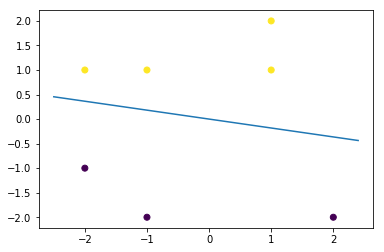

In [41]:
plt.scatter(X1, X2, c=L)
plt.plot (np.arange (-2.5,2.5,0.1), -W[0]/W[2] - W[1]/W[2] * np.arange(-2.5,2.5,0.1))
print(W[1])
print (" w0: %f w1: %f w2: %f Error: %f" %(W[0],W[1],W[2],0))

# the HW is asking for the batch processing, so the nested loop should not process one point, but 
# a batch of points before the weights are updated. Be careful when you are aggregating errors across
# multiple data points since the error pre datapoint is +/- 1... 
for j in range(2): #epochs
    accuracy = 0
    for i in range(rows): #all data in set
        # charge = W[0] + np.sum(np.multiply(data[i, 1:], W[1:]))
        charge = W[0] + np.dot(data[i, 1:], W[1:])
        predict = 1 if charge > 0 else 0
        
        if predict == L[i]:
            accuracy +=1
        else:
            Error = predict - L[i]
            W_t = W
            X_t = np.concatenate(([1], data[i,1:])) #delta weights
            W_t = np.multiply(mu, np.multiply(Error, X_t))
            W = np.subtract(W, W_t)
            print("Error:%f charge:%f predict:%f L[i]:%f "%(Error, charge, predict, L[i]))
            plt.plot (np.arange (-2.5,2.5,0.1), -W[0]/W[2] - W[1]/W[2] * np.arange(-2.5,2.5,0.1))
    print("Accuracy: %f"%(float(accuracy)/rows))
plt.show()
